# Partie 1 : Préparation des données

## 1. Nettoyage des données

### Visualisation des propriétés de données

In [1]:
import pandas as pd
df = pd.DataFrame({'A': [0,0,0,0,0,1,1],
                   'B': [1,2,3,5,4,2,5],
                   'C': [5,3,4,1,1,2,3]})
a_group_desc = df.groupby('B').describe()
unstacked = a_group_desc.unstack()
unstacked

          B
A  count  1    1.0
          2    2.0
          3    1.0
          4    1.0
          5    2.0
              ... 
C  max    1    5.0
          2    3.0
          3    4.0
          4    1.0
          5    3.0
Length: 80, dtype: float64

### Détection et suppression des données redondantes

In [2]:
import pandas as pd
data = {
    'Nom': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob'],
    'Age': [25, 30, 35, 25, 30],
    'Ville': ['Paris', 'Lyon', 'Marseille', 'Paris', 'Lyon']
}

df = pd.DataFrame(data)
df

,Nom,Age,Ville
0,Alice,25,Paris
1,Bob,30,Lyon
2,Charlie,35,Marseille
3,Alice,25,Paris
4,Bob,30,Lyon


In [3]:
db = df.duplicated()
db

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [4]:
df[db]

,Nom,Age,Ville
3,Alice,25,Paris
4,Bob,30,Lyon


In [5]:
df_new = df.drop_duplicates()
df_new

,Nom,Age,Ville
0,Alice,25,Paris
1,Bob,30,Lyon
2,Charlie,35,Marseille


#### Supprimer les doublons en fonction de la colonne 'Nom'

In [6]:
db = df.duplicated(subset=['Nom'])
df[db]

,Nom,Age,Ville
3,Alice,25,Paris
4,Bob,30,Lyon


In [7]:
df_new = df.drop_duplicates(subset=['Nom'])
df_new

,Nom,Age,Ville
0,Alice,25,Paris
1,Bob,30,Lyon
2,Charlie,35,Marseille


### Détection et traitement des données manquantes (missing data)

In [8]:
import numpy as np
s = pd.Series([1, 2, 3, np.nan, 5, 6, None])
s.isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
dtype: bool

In [9]:
s[s.isnull()]

3   NaN
6   NaN
dtype: float64

In [10]:
s.fillna(int(s.mean()))

0    1.0
1    2.0
2    3.0
3    3.0
4    5.0
5    6.0
6    3.0
dtype: float64

In [11]:
s.dropna()

0    1.0
1    2.0
2    3.0
4    5.0
5    6.0
dtype: float64

### Imputation des données manquantes

In [12]:
# Create an empty dataset 
df = pd.DataFrame()
# Create two variables called x0 and x1. Make the first value of x1 a missing value 
df['x0'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
df['x1'] = [np.nan,0.2654,0.2615,0.5846,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]
df

,x0,x1
0,0.3051,NaN
1,0.4949,0.2654
2,0.6974,0.2615
3,0.3769,0.5846
4,0.2231,0.4615
5,0.3410,0.8308
6,0.4436,0.4962
7,0.5897,0.3269
8,0.6308,0.5346
9,0.5000,0.6731


In [13]:
from sklearn.impute import SimpleImputer

# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature  
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Apply the imputer on the df dataset 
mean_imputer = mean_imputer.fit(df)
imputed_df = mean_imputer.transform(df)

imputed_df

array([[0.3051    , 0.49273333],
       [0.4949    , 0.2654    ],
       [0.6974    , 0.2615    ],
       [0.3769    , 0.5846    ],
       [0.2231    , 0.4615    ],
       [0.341     , 0.8308    ],
       [0.4436    , 0.4962    ],
       [0.5897    , 0.3269    ],
       [0.6308    , 0.5346    ],
       [0.5       , 0.6731    ]])

### Sorting et Shuffling

In [14]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': [2,1,2,3,3,5,4],'B': [1,2,3,5,4,2,5],
                   'C': [5,3,4,1,1,2,3]})
df

,A,B,C
0,2,1,5
1,1,2,3
2,2,3,4
3,3,5,1
4,3,4,1
5,5,2,2
6,4,5,3


In [15]:
df = df.sort_values(by=['A'], ascending=[True])
df = df.reset_index(drop=True)
df

,A,B,C
0,1,2,3
1,2,1,5
2,2,3,4
3,3,5,1
4,3,4,1
5,4,5,3
6,5,2,2


In [16]:
index = df.index.tolist()
np.random.shuffle(index)
df = df.iloc[index]
df = df.reset_index(drop=True)
df

,A,B,C
0,2,3,4
1,3,4,1
2,4,5,3
3,5,2,2
4,1,2,3
5,2,1,5
6,3,5,1


## 2. Transformation des données (Normalisation)

In [17]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
names = ['constructor','Model','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

dataset = pd.read_csv(url, names=names)
dataset

,constructor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [18]:
from sklearn.preprocessing import MinMaxScaler

# MIN MAX SCALING 
minmax_scale = MinMaxScaler().fit(dataset[['MYCT', 'MMAX']])
df_minmax = minmax_scale.transform(dataset[['MYCT', 'MMAX']])

# Créer un DataFrame avec les résultats
df_minmax_result = pd.DataFrame(df_minmax, columns=['MYCT_scaled', 'MMAX_scaled'])
df_minmax_result

,MYCT_scaled,MMAX_scaled
0,0.072825,0.092843
1,0.008092,0.499499
2,0.008092,0.499499
3,0.008092,0.499499
4,0.008092,0.249249
...,...,...
204,0.072151,0.124124
205,0.054619,0.124124
206,0.072825,0.124124
207,0.312205,0.124124


## 3. Reduction des données (Agrégation des données)

In [19]:
df = pd.DataFrame({'Map': [0,0,0,1,1,2,2], 'Values': [1,2,3,5,4,2,5]})

# Somme et moyenne par groupe
df['Sum'] = df.groupby('Map')['Values'].transform('sum')
df['Moy'] = df.groupby('Map')['Values'].transform('mean')
df

,Map,Values,Sum,Moy
0,0,1,6,2.0
1,0,2,6,2.0
2,0,3,6,2.0
3,1,5,9,4.5
4,1,4,9,4.5
5,2,2,7,3.5
6,2,5,7,3.5


## 4. Discrétisation des données

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()

iris_nparray = iris.data
iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_dataframe['group'] = pd.Series([iris.target_names[k] for k in iris.target], dtype="category")
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
iris_dataframe.mean(numeric_only=True)

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [22]:
iris_dataframe.median(numeric_only=True)

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

In [23]:
print("Discrétisation basée sur des effectifs égaux (ou quantiles) :")
iris_dataframe.quantile(np.array([0,.25,.50,.75,1]))

Discrétisation basée sur des effectifs égaux (ou quantiles) :


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
0.00,4.3,2.0,1.00,0.1,0.0
0.25,5.1,2.8,1.60,0.3,0.0
0.50,5.8,3.0,4.35,1.3,1.0
0.75,6.4,3.3,5.10,1.8,2.0
1.00,7.9,4.4,6.90,2.5,2.0


In [24]:
#Le binning transforme les variables numériques en variables catégoriques
# divise la colonne en 4 intervalles contenant approximativement le même nombre de valeurs
iris_binned = pd.concat([
    pd.qcut(iris_dataframe.iloc[:,0], [0, .25, .5, .75, 1]),
    pd.qcut(iris_dataframe.iloc[:,1], [0, .25, .5, .75, 1]),
    pd.qcut(iris_dataframe.iloc[:,2], [0, .25, .5, .75, 1]),
    pd.qcut(iris_dataframe.iloc[:,3], [0, .25, .5, .75, 1]),
], join='outer', axis = 1)
print("Bining IrisData")
iris_binned

Bining IrisData


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,"(4.2989999999999995, 5.1]","(3.3, 4.4]","(0.999, 1.6]","(0.099, 0.3]"
1,"(4.2989999999999995, 5.1]","(2.8, 3.0]","(0.999, 1.6]","(0.099, 0.3]"
2,"(4.2989999999999995, 5.1]","(3.0, 3.3]","(0.999, 1.6]","(0.099, 0.3]"
3,"(4.2989999999999995, 5.1]","(3.0, 3.3]","(0.999, 1.6]","(0.099, 0.3]"
4,"(4.2989999999999995, 5.1]","(3.3, 4.4]","(0.999, 1.6]","(0.099, 0.3]"
...,...,...,...,...
145,"(6.4, 7.9]","(2.8, 3.0]","(5.1, 6.9]","(1.8, 2.5]"
146,"(5.8, 6.4]","(1.999, 2.8]","(4.35, 5.1]","(1.8, 2.5]"
147,"(6.4, 7.9]","(2.8, 3.0]","(5.1, 6.9]","(1.8, 2.5]"
148,"(5.8, 6.4]","(3.3, 4.4]","(5.1, 6.9]","(1.8, 2.5]"


In [25]:
#obtenir une fréquence pour chaque variable catégorique de l'ensemble de données  
print("Fréquence dans chanque catégorie")
print(iris_dataframe['group'].value_counts())

print("Fréquence pour chaque marge de valeurs")
print(iris_binned['petal length (cm)'].value_counts())

Fréquence dans chanque catégorie
group
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
Fréquence pour chaque marge de valeurs
petal length (cm)
(0.999, 1.6]    44
(4.35, 5.1]     41
(5.1, 6.9]      34
(1.6, 4.35]     31
Name: count, dtype: int64


# Partie 2 : Réduction de dimension (Iris Dataset)

## 1. Réduction basée sur une sélection des caractéristiques (Méthode Filter)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.datasets import load_iris

iris = load_iris()
X,y = iris.data, iris.target
chi2_score, chi_2_p_value = chi2(X,y)
f_score, f_p_value = f_classif(X,y)
mut_info_score = mutual_info_classif(X,y)
print("Les scores de corrélation des features :")
print('chi2 score        ', chi2_score)
print('F - score score   ', f_score)
print('mutual info       ', mut_info_score)

Les scores de corrélation des features :
chi2 score         [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
F - score score    [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
mutual info        [0.50700843 0.2266326  0.98423082 0.98116229]


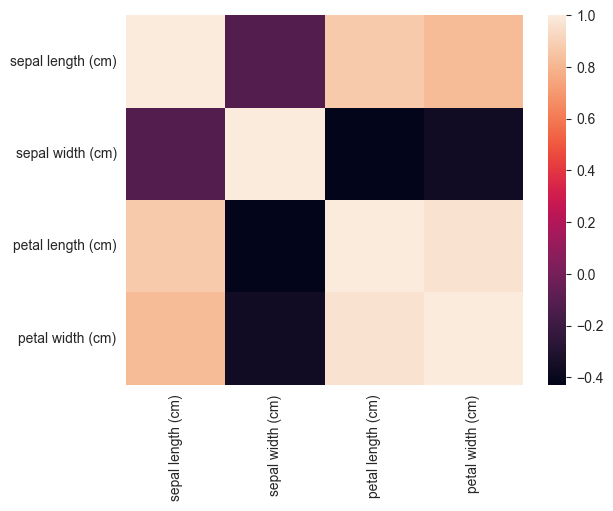

In [27]:
dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
corr = dataframe.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## 2. Réduction basée sur une transformation des données (PCA)

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data  # Caractéristiques 
y = data.target  # Étiquettes 

# Étape 1 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Étape 2 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Étape 3 :
print(pca.explained_variance_ratio_)

# Étape 4 :
df_pca = pd.DataFrame(X_pca, columns=['Composante 1', 'Composante 2'])
df_pca['Classe'] = y

df_pca.head()


[0.72962445 0.22850762]


,Composante 1,Composante 2,Classe
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


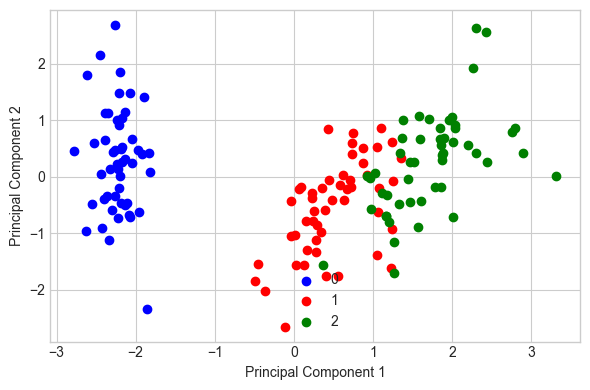

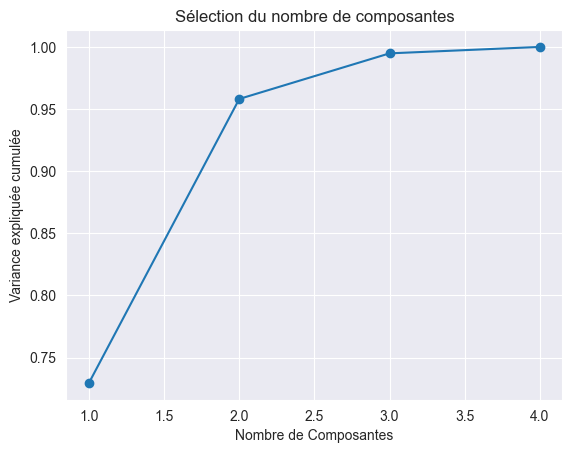

In [29]:
#plot graphique d’observation des données 
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
                        ('blue', 'red', 'green')):
        plt.scatter(X_pca[y==lab, 0],
                    X_pca[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

# Gaphique de la variance expliquée cumulative 
pca_full = PCA().fit(X_scaled)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Sélection du nombre de composantes')
plt.show() 